In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df =pd.read_csv(r"C:\Users\Mohamed\Downloads\taxi_trip_pricing.csv")


df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [5]:
df.describe(include='all')

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


### **Handling Missing Value**

In [6]:
df['Trip_Distance_km'].value_counts()

10.14    3
13.64    3
32.04    3
31.29    3
3.22     3
        ..
32.12    1
19.36    1
31.67    1
25.65    1
22.85    1
Name: Trip_Distance_km, Length: 867, dtype: int64

<Axes: >

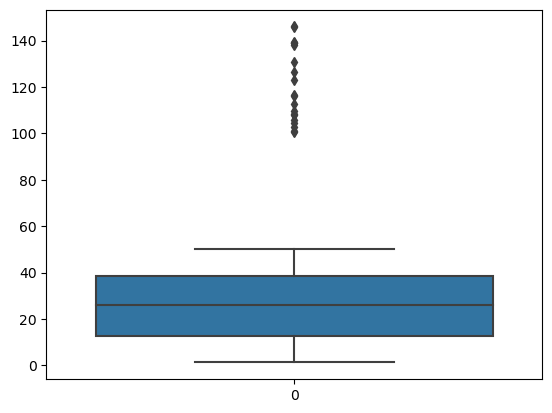

In [7]:
sns.boxplot(df['Trip_Distance_km'])

## handling missing values(Trip_Distance_km)

In [8]:
df['Trip_Distance_km']=df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median())

In [9]:
df['Trip_Distance_km'].isnull().sum()

0

## handling outliers(Trip_Distance_km)

<Axes: >

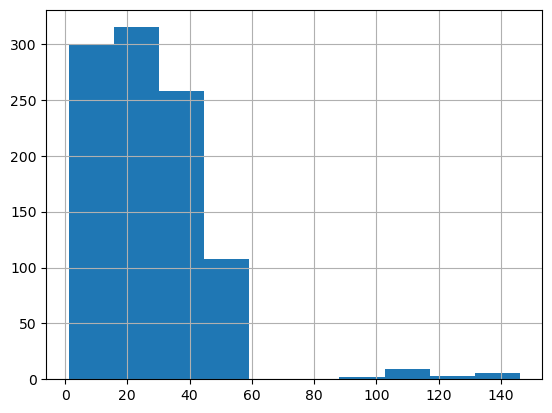

In [10]:
df['Trip_Distance_km'].hist()

In [11]:
Q1=df['Trip_Distance_km'].quantile(0.25)
Q3=df['Trip_Distance_km'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['Trip_Distance_km']<lower_bound) | (df['Trip_Distance_km']>upper_bound)]
median_value=df['Trip_Distance_km'].median()
df['Trip_Distance_km']=df['Trip_Distance_km'].apply(lambda x: median_value if x<lower_bound or x>upper_bound else x)

<Axes: >

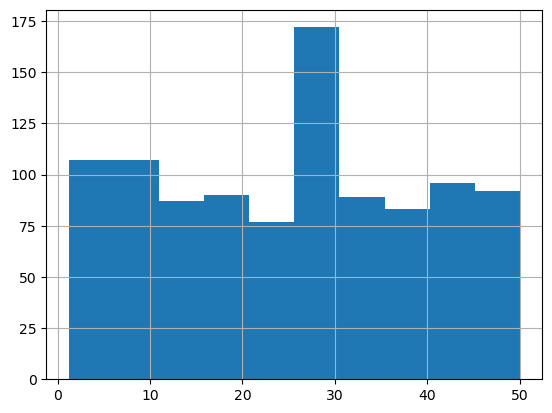

In [12]:
df['Trip_Distance_km'].hist()

## handling missing value (Time_of_Day)

In [13]:
df['Time_of_Day'].value_counts()

Afternoon    371
Morning      283
Evening      203
Night         93
Name: Time_of_Day, dtype: int64

In [14]:
df['Time_of_Day'].isnull().sum()

50

In [15]:
df['Time_of_Day']=df['Time_of_Day'].apply(lambda x:np.random.choice(['Morning','Afternoon','Evening','Night']) if pd.isnull(x) else x)

In [16]:
df['Time_of_Day'].isnull().sum()

0

In [17]:
df['Time_of_Day'].value_counts()

Afternoon    383
Morning      291
Evening      218
Night        108
Name: Time_of_Day, dtype: int64

# handling missing value of (Day_of_Week)

In [18]:
df['Day_of_Week'].value_counts()

Weekday    655
Weekend    295
Name: Day_of_Week, dtype: int64

In [19]:
df['Day_of_Week'].isnull().sum()

50

In [20]:
df['Day_of_Week']=df['Day_of_Week'].apply(lambda x:np.random.choice(['Weekday','Weekend']) if pd.isnull(x) else x)

In [21]:
df['Day_of_Week'].isnull().sum()

0

In [22]:
df['Day_of_Week'].value_counts()

Weekday    680
Weekend    320
Name: Day_of_Week, dtype: int64

# handling missing value(Passenger_Count)

In [23]:
df['Passenger_Count'].value_counts()

3.0    251
2.0    241
1.0    238
4.0    220
Name: Passenger_Count, dtype: int64

In [24]:
df['Passenger_Count'].isnull().sum()

50

In [25]:
df['Passenger_Count']=df['Passenger_Count'].apply(lambda x:np.random.choice([1,2,3,4]) if pd.isnull(x) else x)

In [26]:
df['Passenger_Count'].isnull().sum()

0

In [27]:
df['Passenger_Count'].value_counts()

3.0    264
2.0    254
1.0    250
4.0    232
Name: Passenger_Count, dtype: int64

## handling missing value(	Traffic_Conditions)

In [28]:
df['Traffic_Conditions'].value_counts()

Low       397
Medium    371
High      182
Name: Traffic_Conditions, dtype: int64

In [29]:
df['Traffic_Conditions'].isnull().sum()

50

In [30]:
df['Traffic_Conditions']=df['Traffic_Conditions'].apply(lambda x:np.random.choice(['Low','Medium','High']) if pd.isnull(x) else x)

In [31]:
df['Traffic_Conditions'].isnull().sum()

0

In [32]:
df['Traffic_Conditions'].value_counts()

Low       413
Medium    390
High      197
Name: Traffic_Conditions, dtype: int64

## handling missing value of (Weather)

In [33]:
df['Weather'].value_counts()

Clear    667
Rain     227
Snow      56
Name: Weather, dtype: int64

In [34]:
df['Weather'].isnull().sum()

50

In [35]:
df['Weather']=df['Weather'].apply(lambda x:np.random.choice(['Clear','Rain','Snow']) if pd.isnull(x) else x)

In [36]:
df['Weather'].isnull().sum()

0

In [37]:
df['Weather'].value_counts()

Clear    680
Rain     243
Snow      77
Name: Weather, dtype: int64

## handling missing value of(Base_Fare)

In [38]:
df['Base_Fare'].value_counts()

3.94    10
2.80     8
3.88     8
2.32     8
4.62     7
        ..
3.18     1
4.38     1
2.54     1
3.98     1
2.67     1
Name: Base_Fare, Length: 290, dtype: int64

<Axes: >

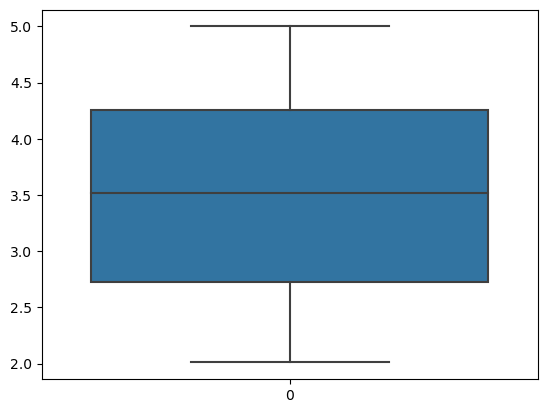

In [39]:
sns.boxplot(df['Base_Fare'])

In [40]:
df['Base_Fare']=df['Base_Fare'].fillna(df['Base_Fare'].mean())

In [41]:
df['Base_Fare'].isnull().sum()

0

In [42]:
df['Base_Fare'].value_counts()

3.502989    50
3.940000    10
3.880000     8
2.800000     8
2.320000     8
            ..
2.540000     1
3.980000     1
2.010000     1
4.180000     1
2.670000     1
Name: Base_Fare, Length: 291, dtype: int64

<Axes: >

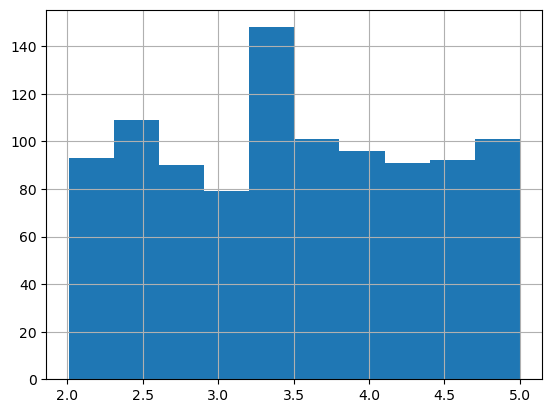

In [43]:
df['Base_Fare'].hist()

## handling missing value (Per_Km_Rate)

In [44]:
df['Per_Km_Rate'].value_counts()

0.63    15
1.50    13
1.71    12
1.90    12
0.79    12
        ..
2.00     2
0.50     2
1.99     2
1.68     2
0.52     2
Name: Per_Km_Rate, Length: 150, dtype: int64

In [45]:
df['Per_Km_Rate'].isnull().sum()

50

<Axes: >

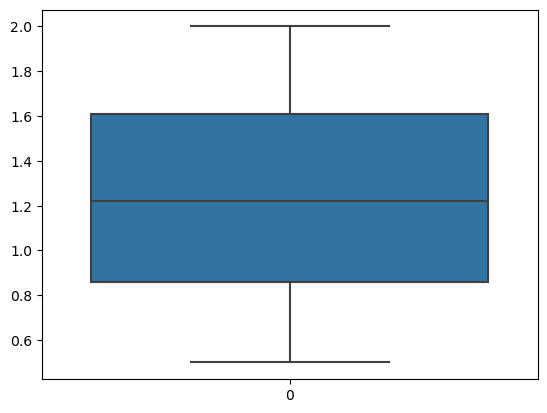

In [46]:
sns.boxplot(df['Per_Km_Rate'])

In [47]:
df['Per_Km_Rate']=df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean())

In [48]:
df['Per_Km_Rate'].value_counts()

1.233316    50
0.630000    15
1.500000    13
1.900000    12
1.920000    12
            ..
2.000000     2
0.500000     2
1.990000     2
1.680000     2
0.520000     2
Name: Per_Km_Rate, Length: 151, dtype: int64

In [49]:
df['Per_Km_Rate'].isnull().sum()

0

## handling missing value of (Per_Minute_Rate)

In [50]:
df['Per_Minute_Rate'].value_counts()

0.15    35
0.28    33
0.18    32
0.38    31
0.23    30
0.12    30
0.31    27
0.42    27
0.20    27
0.11    26
0.30    25
0.19    25
0.49    24
0.17    24
0.26    24
0.34    24
0.36    24
0.39    23
0.37    23
0.40    23
0.33    22
0.14    22
0.32    21
0.46    21
0.27    21
0.45    21
0.16    21
0.13    21
0.44    21
0.43    21
0.21    21
0.48    21
0.35    20
0.25    20
0.47    20
0.22    20
0.24    19
0.41    19
0.29    18
0.10    14
0.50     9
Name: Per_Minute_Rate, dtype: int64

In [51]:
df['Per_Minute_Rate'].isnull().sum()

50

<Axes: >

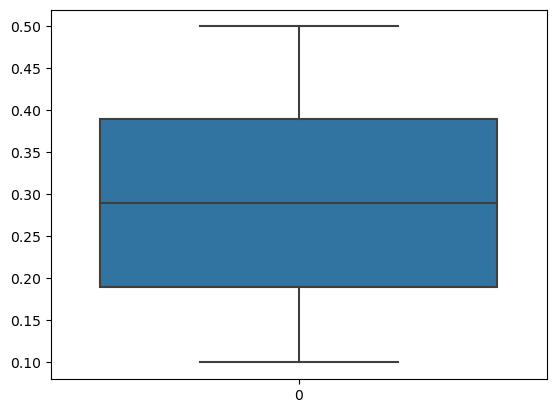

In [52]:
sns.boxplot(df['Per_Minute_Rate'])

In [53]:
df['Per_Minute_Rate']=df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean())

In [54]:
df['Per_Minute_Rate'].isnull().sum()

0

## handling missing value of (Trip_Duration_Minutes)

In [55]:
df['Trip_Duration_Minutes'].value_counts()

89.21     3
113.49    2
94.11     2
30.31     2
65.42     2
         ..
70.95     1
103.17    1
32.82     1
105.77    1
29.69     1
Name: Trip_Duration_Minutes, Length: 917, dtype: int64

In [56]:
df['Trip_Duration_Minutes'].isnull().sum()

50

<Axes: >

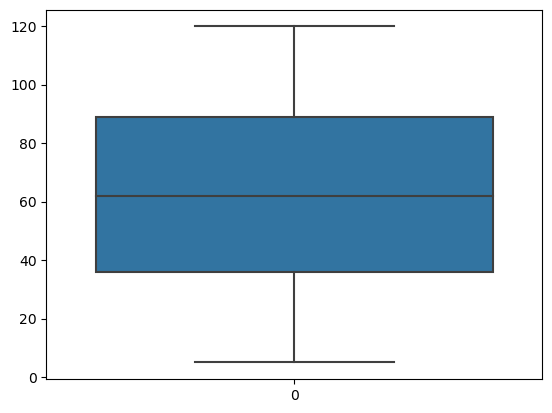

In [57]:
sns.boxplot(df['Trip_Duration_Minutes'])

In [58]:
df['Trip_Duration_Minutes']=df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean())

In [59]:
df['Trip_Duration_Minutes'].isnull().sum()

0

## handling missing value (Trip_Price)

In [60]:
df['Trip_Price'].value_counts()

36.2624    1
50.7890    1
85.4652    1
69.9148    1
72.1607    1
          ..
46.7471    1
45.8975    1
58.5727    1
86.8977    1
45.4437    1
Name: Trip_Price, Length: 951, dtype: int64

In [61]:
df['Trip_Price'].isnull().sum()

49

<Axes: >

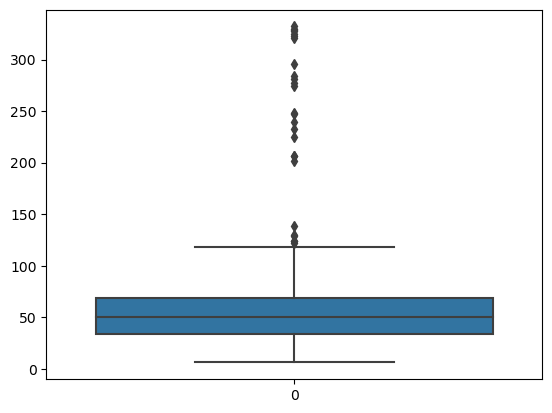

In [62]:
sns.boxplot(df['Trip_Price'])

<Axes: >

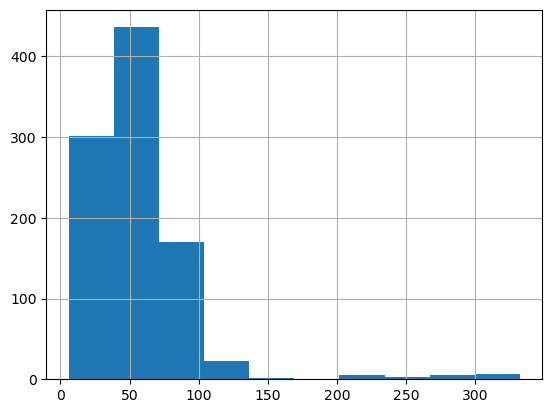

In [63]:
df['Trip_Price'].hist()

In [64]:
df['Trip_Price']=df['Trip_Price'].fillna(df['Trip_Price'].median())

In [65]:
Q1=df['Trip_Price'].quantile(0.25)
Q3=df['Trip_Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['Trip_Price']<lower_bound) | (df['Trip_Price']>upper_bound)]

In [66]:
df['Trip_Price']=df['Trip_Price'].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

## Inconsistent Data Entry

In [67]:
for col in df.columns:
  if df[col].dtype=='object':
    print(df[col].unique())
    print('**********************************************************')

['Morning' 'Afternoon' 'Evening' 'Night']
**********************************************************
['Weekday' 'Weekend']
**********************************************************
['Low' 'High' 'Medium']
**********************************************************
['Clear' 'Rain' 'Snow']
**********************************************************


**"Data doesn't have any consistency"**

In [68]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [69]:
df=pd.read_csv(r"C:\Users\Mohamed\Downloads\taxi_trip_pricing_cleaned.csv")
df.head()

,Unnamed: 0,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,50.0745
2,2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,3,30.33,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.4698
4,4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180


In [70]:
df.describe()

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,25.112000,2.477000,3.502989,1.233316,0.292916,62.118116,53.302532
std,288.819436,13.871956,1.105755,0.848107,0.418922,0.112662,31.339413,24.761083
min,0.000000,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,249.750000,13.107500,1.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,499.500000,25.830000,2.000000,3.502989,1.233316,0.292916,62.118116,50.074500
75%,749.250000,36.727500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,999.000000,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,116.823350


In [71]:
df.head()

,Unnamed: 0,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,50.0745
2,2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,3,30.33,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.4698
4,4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180


In [72]:
df_copy=df

<Axes: title={'center': 'Time of Day'}, ylabel='count of each time'>

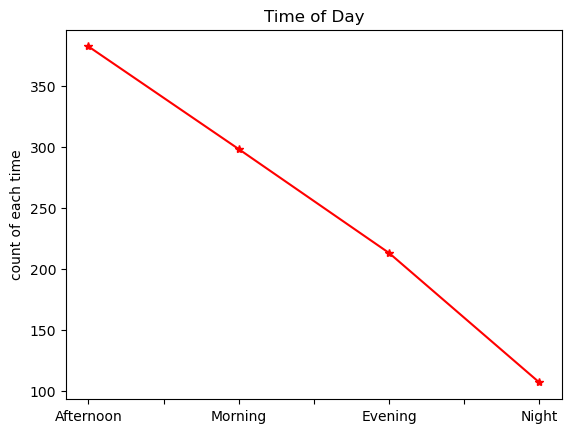

In [73]:
#TASK 1.1: Develop a Line chart using the functionality of pandas
df['Time_of_Day'].value_counts().plot(ylabel='count of each time',title='Time of Day',color='r',marker='*')

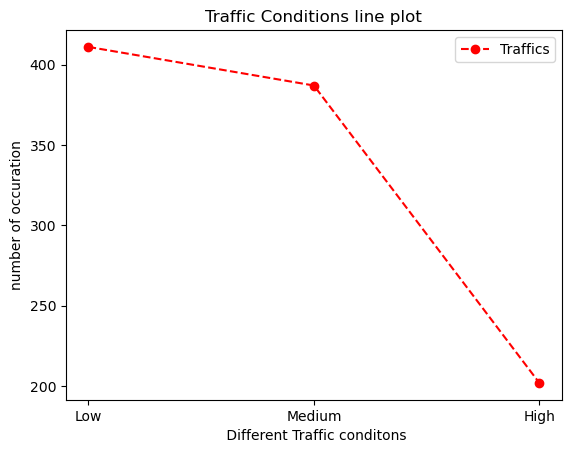

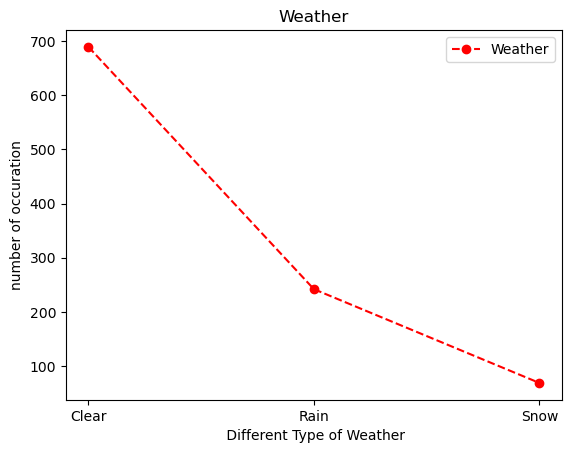

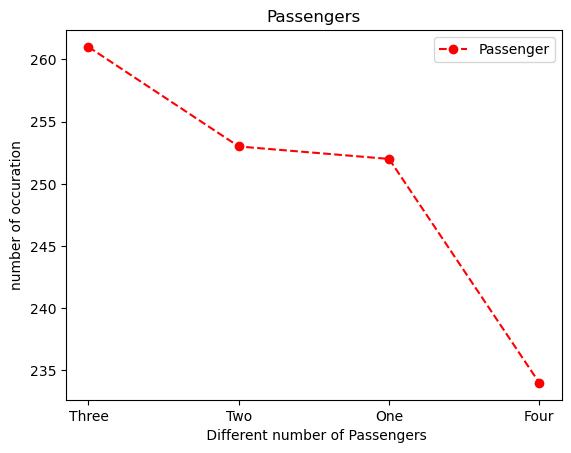

In [74]:
#TASK 1.2: Plot different lines for different categories

traffic = df['Traffic_Conditions'].value_counts().index
traffic_val=df['Traffic_Conditions'].value_counts().values
#Line plot for traffic conditions indexes and values
plt.figure()
plt.plot(traffic,traffic_val ,'r--',marker='o',label='Traffics')
plt.title('Traffic Conditions line plot')
plt.ylabel('number of occuration')
plt.xlabel(' Different Traffic conditons')
plt.legend()
plt.show()
# line plot for Weather
Weather = df['Weather'].value_counts().index
Weather_val=df['Weather'].value_counts().values
plt.figure()
plt.plot(Weather,Weather_val ,'r--',marker='o',label='Weather')
plt.title('Weather')
plt.ylabel('number of occuration')
plt.xlabel(' Different Type of Weather')
plt.legend()
plt.show()


# line plot for Passenger Count
Passenger_val=df['Passenger_Count'].value_counts().values
plt.figure()
plt.plot(['Three','Two','One','Four'],Passenger_val ,'r--',marker='o',label='Passenger')
plt.title('Passengers')
plt.ylabel('number of occuration')
plt.xlabel(' Different number of Passengers')
plt.legend()
plt.show()





<Axes: xlabel='Time_of_Day', ylabel='Trip_Price'>

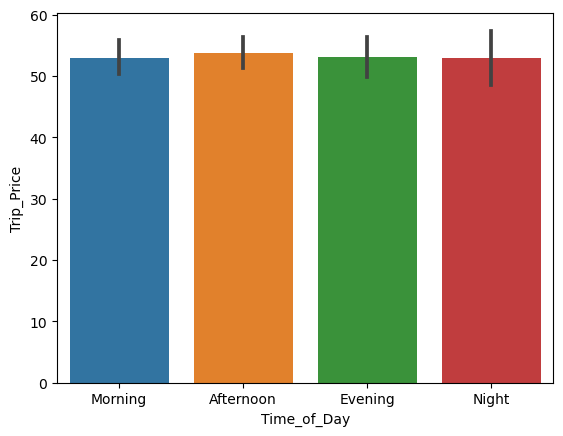

In [75]:
#TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare different
#categories.
#Compare between mean for each type of time in day and total trip price
sns.barplot(x='Time_of_Day',y='Trip_Price',data=df)

In [76]:
df.columns

Index(['Unnamed: 0', 'Trip_Distance_km', 'Time_of_Day', 'Day_of_Week',
       'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare',
       'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
       'Trip_Price'],
      dtype='object')

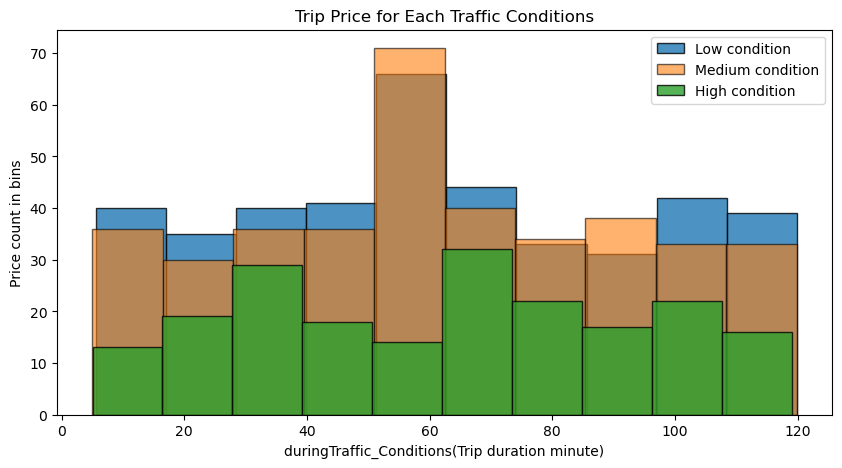

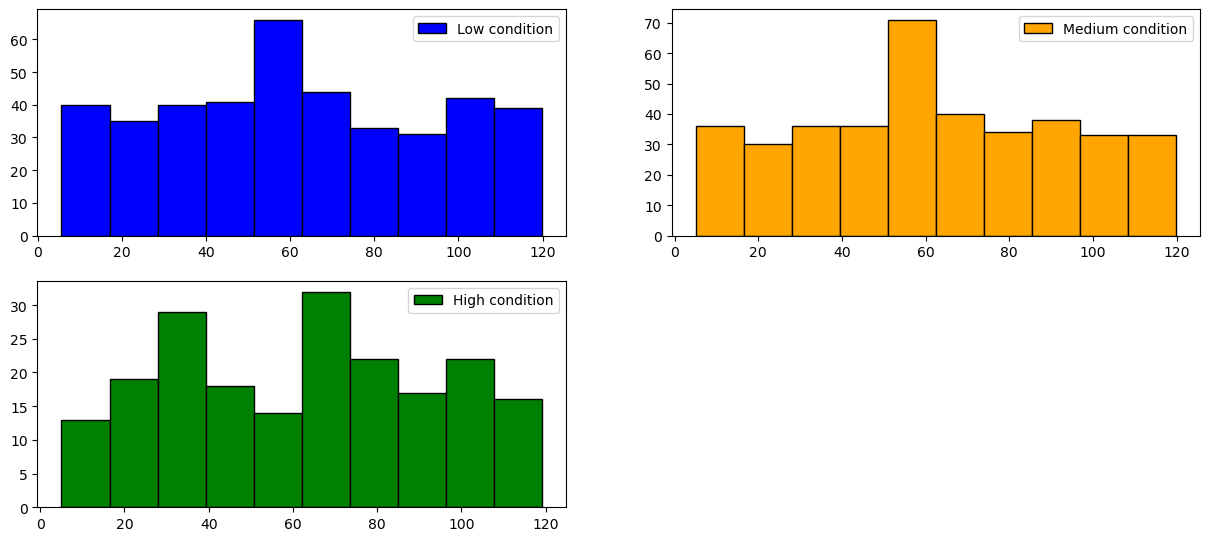

In [77]:
#TASK 1.4: Use sub plotting to draw more than one plot for comparison.

Low=df.groupby('Traffic_Conditions').get_group('Low')['Trip_Duration_Minutes'].values
Medium=df.groupby('Traffic_Conditions').get_group('Medium')['Trip_Duration_Minutes'].values
High=df.groupby('Traffic_Conditions').get_group('High')['Trip_Duration_Minutes'].values
#Addition from us to you before subplots

plt.figure(figsize=(10,5))
plt.hist(Low,edgecolor='black' ,label='Low condition',alpha=0.8)
plt.hist(Medium,edgecolor='black',label='Medium condition',alpha=0.6)
plt.hist(High,edgecolor='black',label='High condition',alpha=0.8)
plt.title('Trip Price for Each Traffic Conditions')
plt.xlabel('duringTraffic_Conditions(Trip duration minute)')
plt.ylabel('Price count in bins')
plt.legend()
plt.show()

# Sub plot to compare between Total trip time in different traffic conditions
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.hist(Low,edgecolor='black' ,label='Low condition',color='blue')
plt.legend()
plt.subplot(3,2,2)
plt.hist(Medium,edgecolor='black',label='Medium condition',color='orange')
plt.legend()
plt.subplot(3,2,3)
plt.hist(High,edgecolor='black',label='High condition',color='green')
plt.legend()

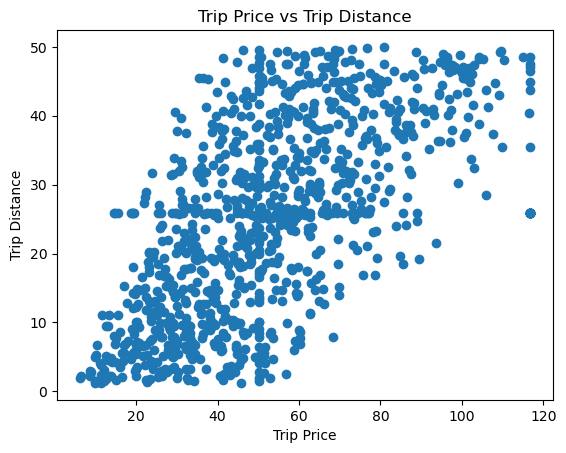

<Figure size 640x480 with 0 Axes>

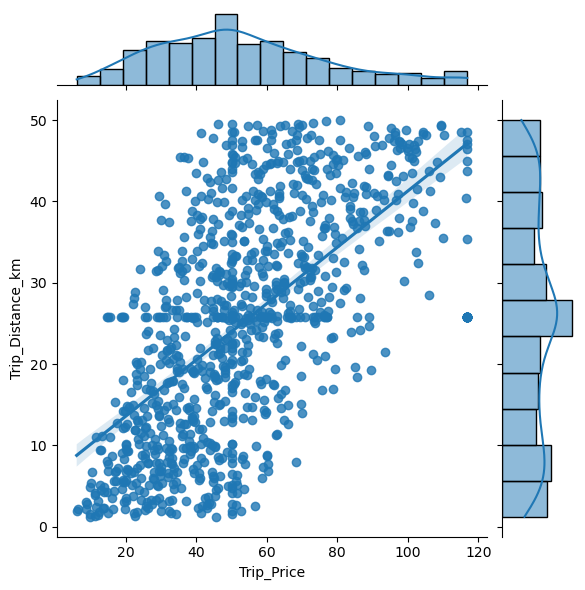

In [79]:
# TASK 1.5: Develop a Bubble plot for displaying the impact of your dataset factors.
# TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot and draw the best fit for
# regression process.

plt.figure()
plt.scatter(x='Trip_Price',y='Trip_Distance_km',data=df)
plt.title('Trip Price vs Trip Distance')
plt.xlabel('Trip Price')
plt.ylabel('Trip Distance')
plt.figure()
sns.jointplot(x='Trip_Price',y='Trip_Distance_km',data=df,kind="reg")

Text(0.5, 1.0, 'Weather')

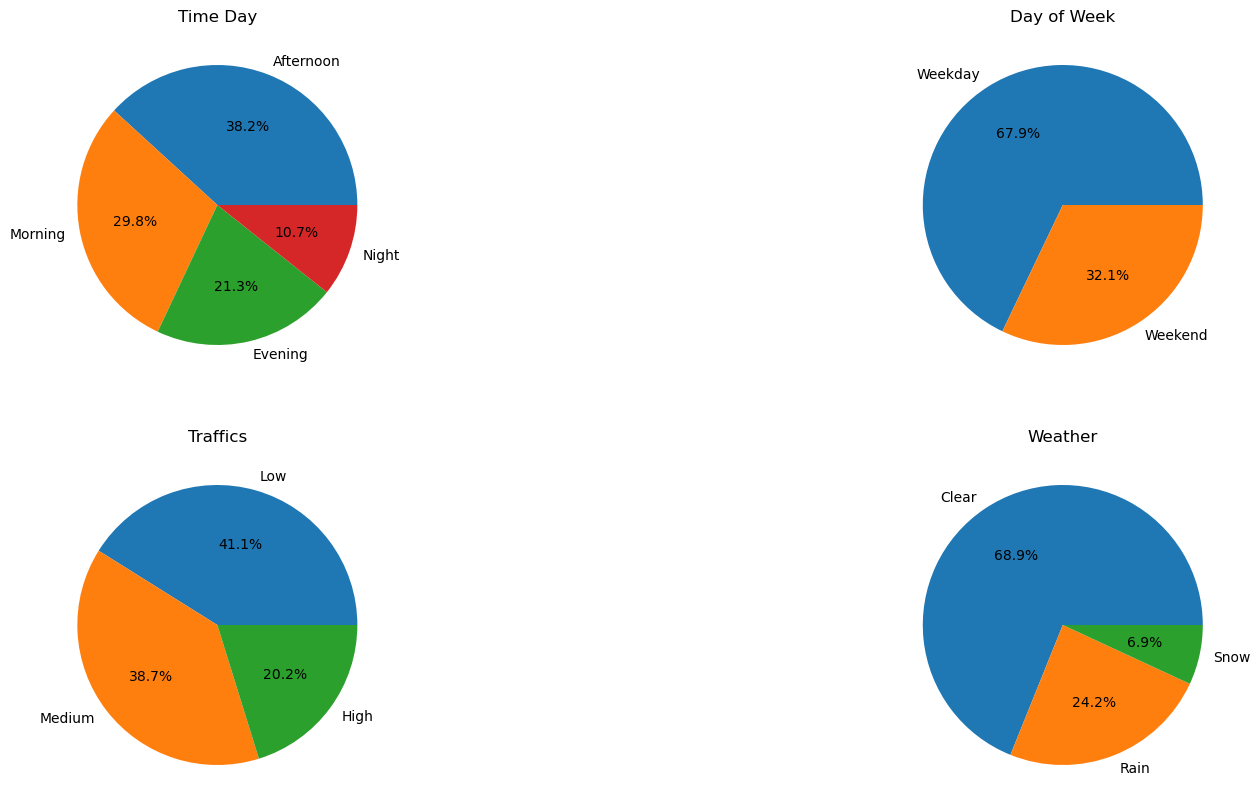

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [80]:
#TASK 1.7: Create a pie chart to display portions of your dataset
#Additions from us put it in subplots


Day=df['Time_of_Day'].value_counts().index
Day_val=df['Time_of_Day'].value_counts().values

Week=df['Day_of_Week'].value_counts().index
Week_val=df['Day_of_Week'].value_counts().values

Traffic=df['Traffic_Conditions'].value_counts().index
Traffic_val=df['Traffic_Conditions'].value_counts().values

Weather=df['Weather'].value_counts().index
Weather_val=df['Weather'].value_counts().values


fig=plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 2)
# Create the Day in the first row, first column
ax1=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(Day_val,labels=Day,autopct='%1.1f%%')
ax1.set_title('Time Day')

# Create the Week in the first row, second column
ax2=plt.figure(figsize=(15,5))
ax2= fig.add_subplot(gs[0, 1])
ax2.pie(Week_val,labels=Week,autopct='%1.1f%%')
ax2.set_title('Day of Week')

# Create the Traffic in the second row, first column
ax3=plt.figure(figsize=(15,5))
ax3 = fig.add_subplot(gs[1, 0])
ax3.pie(Traffic_val,labels=Traffic,autopct='%1.1f%%')
ax3.set_title('Traffics')


# Create the Weather in second column second row
ax4=plt.figure(figsize=(15,5))
ax4 = fig.add_subplot(gs[1, 1])
ax4.pie(Weather_val,labels=Weather,autopct='%1.1f%%')
ax4.set_title('Weather')



## **part3**

In [81]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['Unnamed: 0', 'Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
       'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes',
       'Trip_Price'],
      dtype='object')

In [82]:
df[numerical_columns].corr()

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Unnamed: 0,1.000000,-0.038762,0.058661,0.000837,-0.012521,-0.012138,0.024935,-0.030631
Trip_Distance_km,-0.038762,1.000000,-0.003824,0.045330,-0.037527,-0.013970,-0.037787,0.618092
Passenger_Count,0.058661,-0.003824,1.000000,0.025486,0.035716,0.038294,0.022352,0.025818
Base_Fare,0.000837,0.045330,0.025486,1.000000,0.002919,-0.018119,0.011501,0.045123
Per_Km_Rate,-0.012521,-0.037527,0.035716,0.002919,1.000000,0.027863,0.025732,0.383400
Per_Minute_Rate,-0.012138,-0.013970,0.038294,-0.018119,0.027863,1.000000,-0.022822,0.230443
Trip_Duration_Minutes,0.024935,-0.037787,0.022352,0.011501,0.025732,-0.022822,1.000000,0.321396
Trip_Price,-0.030631,0.618092,0.025818,0.045123,0.383400,0.230443,0.321396,1.000000


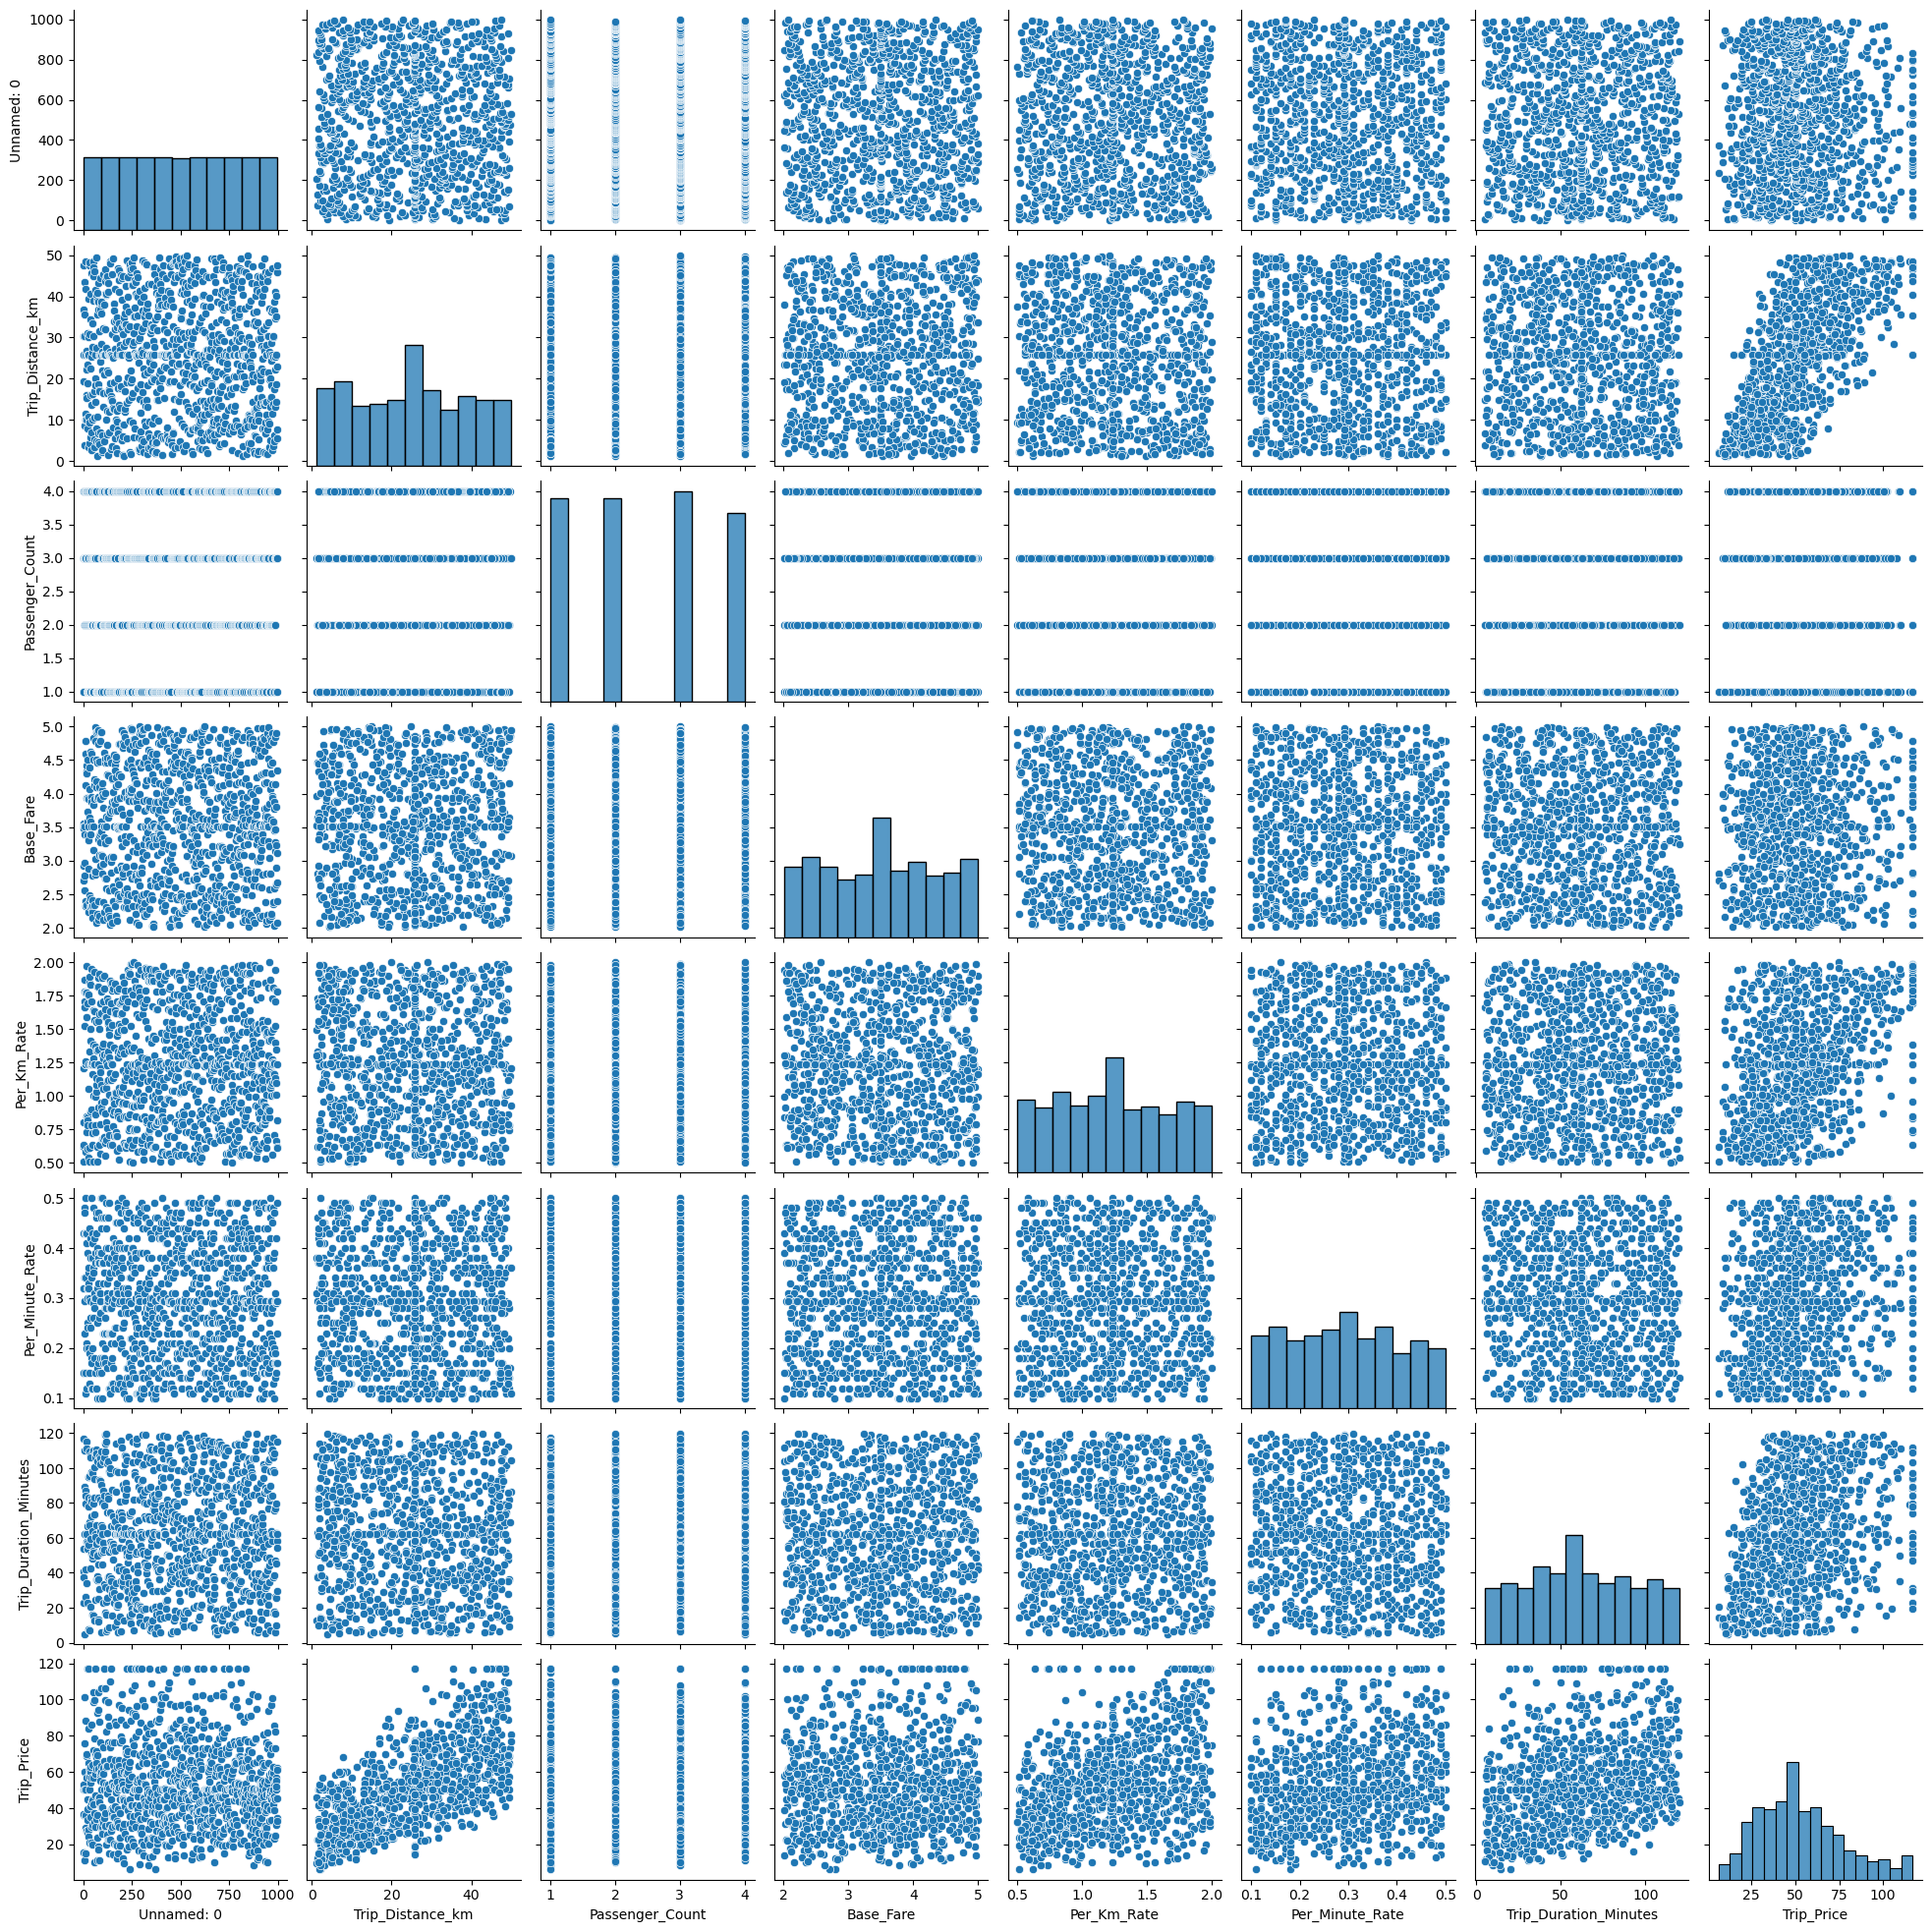

In [83]:
sns.pairplot(df[numerical_columns])

In [84]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_columns:
  df[i]=le.fit_transform(df[i])

#

In [86]:
df[categorical_columns]

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,2,0,1,0
1,0,0,0,0
2,1,1,0,0
3,1,0,1,0
4,1,0,0,0
...,...,...,...,...
995,0,1,2,0
996,3,0,2,0
997,2,0,1,1
998,2,0,1,0


In [87]:
data_new=df[categorical_columns].join(df['Trip_Price'])

In [88]:
data_new

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Price
0,2,0,1,0,36.2624
1,0,0,0,0,50.0745
2,1,1,0,0,52.9032
3,1,0,1,0,36.4698
4,1,0,0,0,15.6180
...,...,...,...,...,...
995,0,1,2,0,34.4049
996,3,0,2,0,62.1295
997,2,0,1,1,33.1236
998,2,0,1,0,61.2090


In [89]:
data_new.corr()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Price
Time_of_Day,1.000000,-0.017902,-0.015488,-0.014723,-0.013430
Day_of_Week,-0.017902,1.000000,0.042029,0.000070,-0.021406
Traffic_Conditions,-0.015488,0.042029,1.000000,0.052058,-0.063926
Weather,-0.014723,0.000070,0.052058,1.000000,0.025281
Trip_Price,-0.013430,-0.021406,-0.063926,0.025281,1.000000


In [90]:
new_df=df[numerical_columns].join(df[categorical_columns])

In [91]:
new_df

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,0,19.35,3.0,3.560000,0.800000,0.320000,53.82,36.2624,2,0,1,0
1,1,47.59,1.0,3.502989,0.620000,0.430000,40.57,50.0745,0,0,0,0
2,2,36.87,1.0,2.700000,1.210000,0.150000,37.27,52.9032,1,1,0,0
3,3,30.33,4.0,3.480000,0.510000,0.150000,116.81,36.4698,1,0,1,0
4,4,25.83,3.0,2.930000,0.630000,0.320000,22.64,15.6180,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,5.49,4.0,2.390000,0.620000,0.490000,58.39,34.4049,0,1,2,0
996,996,45.95,4.0,3.120000,0.610000,0.292916,61.96,62.1295,3,0,2,0
997,997,7.70,3.0,2.080000,1.780000,0.292916,54.18,33.1236,2,0,1,1
998,998,47.56,1.0,2.670000,0.820000,0.170000,114.94,61.2090,2,0,1,0


In [92]:
new_df.corr()

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
Unnamed: 0,1.000000,-0.038762,0.058661,0.000837,-0.012521,-0.012138,0.024935,-0.030631,-0.052707,0.044412,0.083811,-0.007997
Trip_Distance_km,-0.038762,1.000000,-0.003824,0.045330,-0.037527,-0.013970,-0.037787,0.618092,-0.032391,-0.014758,-0.048626,-0.007579
Passenger_Count,0.058661,-0.003824,1.000000,0.025486,0.035716,0.038294,0.022352,0.025818,0.044168,0.034659,0.006991,-0.001865
Base_Fare,0.000837,0.045330,0.025486,1.000000,0.002919,-0.018119,0.011501,0.045123,0.022973,-0.025955,0.009979,-0.022394
Per_Km_Rate,-0.012521,-0.037527,0.035716,0.002919,1.000000,0.027863,0.025732,0.383400,0.057416,-0.026881,-0.025450,0.043110
Per_Minute_Rate,-0.012138,-0.013970,0.038294,-0.018119,0.027863,1.000000,-0.022822,0.230443,0.008024,0.007669,0.031096,0.008456
Trip_Duration_Minutes,0.024935,-0.037787,0.022352,0.011501,0.025732,-0.022822,1.000000,0.321396,0.010122,-0.018065,0.003547,0.016454
Trip_Price,-0.030631,0.618092,0.025818,0.045123,0.383400,0.230443,0.321396,1.000000,-0.013430,-0.021406,-0.063926,0.025281
Time_of_Day,-0.052707,-0.032391,0.044168,0.022973,0.057416,0.008024,0.010122,-0.013430,1.000000,-0.017902,-0.015488,-0.014723
Day_of_Week,0.044412,-0.014758,0.034659,-0.025955,-0.026881,0.007669,-0.018065,-0.021406,-0.017902,1.000000,0.042029,0.000070


In [93]:
! pip install dash
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

In [94]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Mohamed\Downloads\taxi_trip_pricing_cleaned.csv")

# Initialize app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(
    [
        html.Div(
            html.Img(src='https://img.freepik.com/free-vector/yellow-taxi-logotype-design_1057-4892.jpg?t=st=1734619163~exp=1734622763~hmac=4114262bc34c7008a569df5e2497d457a2ebcd121d96a56df3cf959ac54ec9d2&w=740',
                     style={'width': '200px', 'display': 'block', 'margin': 'auto'}),
            style={'textAlign': 'center', 'marginTop': '20px'}
        ),

        html.H1('Taxi Dashboard', style={'textAlign': 'center', 'color': 'darkblue', 'fontSize': 30, 'fontFamily': 'Arial'}),

        html.Div(
            [
                html.Label("Select Feature for Analysis:", style={'color': 'darkblue', 'fontSize': 18, 'fontFamily': 'Arial'}),
                dcc.Dropdown(
                    id='feature-dropdown',
                    options=[{'label': col, 'value': col} for col in df.columns if col != 'Trip_Price'],
                    value='Trip_Distance_km',
                    placeholder="Choose a feature",
                    style={'width': '80%', 'margin': 'auto', 'backgroundColor': '#f7f7f7', 'borderRadius': '5px', 'fontFamily': 'Arial'}
                ),
            ],
            style={'width': '50%', 'margin': 'auto', 'padding': '10px'},
        ),

        html.Div(
            [
                html.Label("Select Category to Split Graphs:", style={'color': 'darkblue', 'fontSize': 18, 'fontFamily': 'Arial'}),
                dcc.Dropdown(
                    id='category-dropdown',
                    options=[{'label': col, 'value': col} for col in df.columns if col != 'Trip_Price'],
                    value='Weather',
                    placeholder="Choose a category to split",
                    style={'width': '80%', 'margin': 'auto', 'backgroundColor': '#f7f7f7', 'borderRadius': '5px', 'fontFamily': 'Arial'}
                ),
            ],
            style={'width': '50%', 'margin': 'auto', 'padding': '10px', 'marginTop': '20px'},
        ),

        
        html.Div(
            id='graphs-container',
            style={'marginTop': '20px', 'display': 'grid', 'gridTemplateColumns': '1fr 1fr', 'gap': '10px'}
        ),

        html.Div(
            [
                html.Label("Select Time Range (in minutes):", style={'color': 'darkblue', 'fontSize': 18, 'fontFamily': 'Arial'}),
                dcc.RangeSlider(
                    id='time-range-slider',
                    min=df['Trip_Duration_Minutes'].min(),
                    max=df['Trip_Duration_Minutes'].max(),
                    step=1,
                    marks={i: str(i) for i in range(int(df['Trip_Duration_Minutes'].min()), int(df['Trip_Duration_Minutes'].max()), 10)},
                    value=[df['Trip_Duration_Minutes'].min(), df['Trip_Duration_Minutes'].max()],
                    allowCross=False,
                ),
            ],
            style={'width': '80%', 'margin': 'auto', 'marginTop': '30px'},
        ),
    ],
    style={'backgroundColor': '#f7f7f7', 'padding': '20px', 'fontFamily': 'Arial'},
)

# Callback to update graphs
@app.callback(
    Output('graphs-container', 'children'),
    [Input('feature-dropdown', 'value'),
     Input('time-range-slider', 'value'),
     Input('category-dropdown', 'value')]
)
def update_graphs(selected_feature, time_range, selected_category):
    try:
        filtered_df = df[(df['Trip_Duration_Minutes'] >= time_range[0]) & (df['Trip_Duration_Minutes'] <= time_range[1])]

        if selected_feature not in filtered_df.columns:
            return html.Div(f"Invalid feature selected: {selected_feature}", style={'color': 'red', 'textAlign': 'center', 'fontSize': 18})

        scatter_fig = px.scatter(filtered_df, x=selected_feature, y='Trip_Price',
                                 title=f'Scatter Plot: {selected_feature} vs Trip_Price',
                                 labels={'x': selected_feature, 'y': 'Trip_Price'},
                                 template='plotly_dark', color=selected_category)

        bar_fig = px.bar(filtered_df, x=selected_feature, y='Trip_Price',
                         title=f'Bar Chart: {selected_feature} vs Trip_Price',
                         labels={'x': selected_feature, 'y': 'Trip_Price'},
                         template='plotly_dark', color=selected_category)

        line_fig = px.line(filtered_df, x=selected_feature, y='Trip_Price',
                           title=f'Line Chart: {selected_feature} vs Trip_Price',
                           labels={'x': selected_feature, 'y': 'Trip_Price'},
                           template='plotly_dark', color=selected_category)

        pie_fig = px.pie(filtered_df, names=selected_category, title=f'Distribution of {selected_category}', template='plotly_dark')

        return html.Div(
            [
                dcc.Graph(figure=scatter_fig, style={'height': '400px', 'width': '600px'}),
                dcc.Graph(figure=bar_fig, style={'height': '400px', 'width': '600px'}),
                dcc.Graph(figure=line_fig, style={'height': '400px', 'width': '600px'}),
                dcc.Graph(figure=pie_fig, style={'height': '400px', 'width': '600px'}),
            ],
            style={'display': 'grid', 'gridTemplateColumns': '1fr 1fr', 'gap': '20px'}
        )
    except Exception as e:
        return html.Div(f"Error: {str(e)}", style={'color': 'red', 'textAlign': 'center', 'fontSize': 18})

if __name__ == '__main__':
    app.run_server(debug=True)



In [95]:
df

,Unnamed: 0,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.800000,0.320000,53.82,36.2624
1,1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.620000,0.430000,40.57,50.0745
2,2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.210000,0.150000,37.27,52.9032
3,3,30.33,Evening,Weekday,4.0,Low,Clear,3.480000,0.510000,0.150000,116.81,36.4698
4,4,25.83,Evening,Weekday,3.0,High,Clear,2.930000,0.630000,0.320000,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.390000,0.620000,0.490000,58.39,34.4049
996,996,45.95,Night,Weekday,4.0,Medium,Clear,3.120000,0.610000,0.292916,61.96,62.1295
997,997,7.70,Morning,Weekday,3.0,Low,Rain,2.080000,1.780000,0.292916,54.18,33.1236
998,998,47.56,Morning,Weekday,1.0,Low,Clear,2.670000,0.820000,0.170000,114.94,61.2090


In [96]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
numerical_data=df.select_dtypes(include=['int64','float64'])
categorical_data=df.select_dtypes(include=['object'])


In [97]:
numerical_data

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0,19.35,3.0,3.560000,0.800000,0.320000,53.82,36.2624
1,1,47.59,1.0,3.502989,0.620000,0.430000,40.57,50.0745
2,2,36.87,1.0,2.700000,1.210000,0.150000,37.27,52.9032
3,3,30.33,4.0,3.480000,0.510000,0.150000,116.81,36.4698
4,4,25.83,3.0,2.930000,0.630000,0.320000,22.64,15.6180
...,...,...,...,...,...,...,...,...
995,995,5.49,4.0,2.390000,0.620000,0.490000,58.39,34.4049
996,996,45.95,4.0,3.120000,0.610000,0.292916,61.96,62.1295
997,997,7.70,3.0,2.080000,1.780000,0.292916,54.18,33.1236
998,998,47.56,1.0,2.670000,0.820000,0.170000,114.94,61.2090


In [98]:

for i in categorical_data.columns:
  le=LabelEncoder()
  categorical_data[i]=le.fit_transform(categorical_data[i])


In [99]:
scaler=StandardScaler()
for i in numerical_data.columns:
  numerical_data[i]=scaler.fit_transform(numerical_data[[i]])


In [100]:
new_df=numerical_data.join(categorical_data)

In [101]:
new_df

,Unnamed: 0,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,-1.730320,-0.415578,0.473217,0.067255,-1.034878e+00,0.240523,-0.264915,-0.688526,2,0,1,0
1,-1.726856,1.621202,-1.336408,0.000000,-1.464767e+00,1.217383,-0.687916,-0.130432,0,0,0,0
2,-1.723391,0.848034,-1.336408,-0.947276,-5.568453e-02,-1.269171,-0.793268,-0.016135,1,1,0,0
3,-1.719927,0.376343,1.378029,-0.027120,-1.727477e+00,-1.269171,1.746020,-0.680146,1,0,1,0
4,-1.716463,0.051785,0.473217,-0.675948,-1.440884e+00,0.240523,-1.260326,-1.522687,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,-1.415216,1.378029,-1.312979,-1.464767e+00,1.750217,-0.119019,-0.763581,0,1,2,0
996,1.719927,1.502919,1.378029,-0.451808,-1.488650e+00,0.000000,-0.005048,0.356664,3,0,2,0
997,1.723391,-1.255822,0.473217,-1.678682,1.305633e+00,0.000000,-0.253422,-0.815353,2,0,1,1
998,1.726856,1.619039,-1.336408,-0.982667,-9.871120e-01,-1.091560,1.686321,0.319470,2,0,1,0


In [102]:
from sklearn.model_selection import train_test_split
x=new_df.drop('Trip_Price',axis=1)
y=new_df['Trip_Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


Linear R^2: 0.7940286306226715
mean squared error 0.20123046561563723


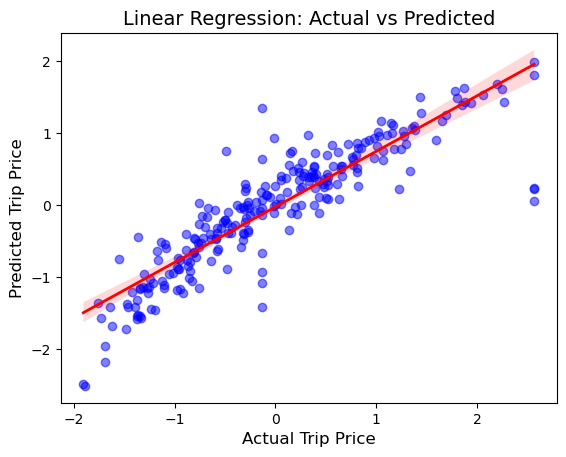

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred_reg=LR.predict(x_test)
print("Linear R^2:", r2_score(y_test, y_pred_reg))
print("mean squared error",mean_squared_error(y_test,y_pred_reg))


plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5)


sns.regplot(x=y_test, y=y_pred_reg, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})

plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)

plt.show()

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


LR = LinearRegression()


cv_scores = cross_val_score(LR, x, y, cv=5, scoring='neg_mean_squared_error')  # مع MSE


cv_scores = -cv_scores

print(f"Cross-Validation MSE: {cv_scores}")
print(f"Average Cross-Validation MSE: {np.mean(cv_scores)}")

cv_r2_scores = cross_val_score(LR, x, y, cv=5, scoring='r2')
print(f"Cross-Validation R²: {cv_r2_scores}")
print(f"Average Cross-Validation R²: {np.mean(cv_r2_scores)}")



Cross-Validation MSE: [0.31919377 0.40453113 0.31780274 0.21526479 0.19321547]
Average Cross-Validation MSE: 0.2900015779605888
Cross-Validation R²: [0.70685481 0.65881656 0.69410667 0.77302214 0.73045839]
Average Cross-Validation R²: 0.7126517148804946


Lasso R^2: 0.7961988556740349
Ridge R^2: 0.7940282000380665
mean squared error Lasso 0.19911019327440455
mean squared error Ridge  0.20123088628934943


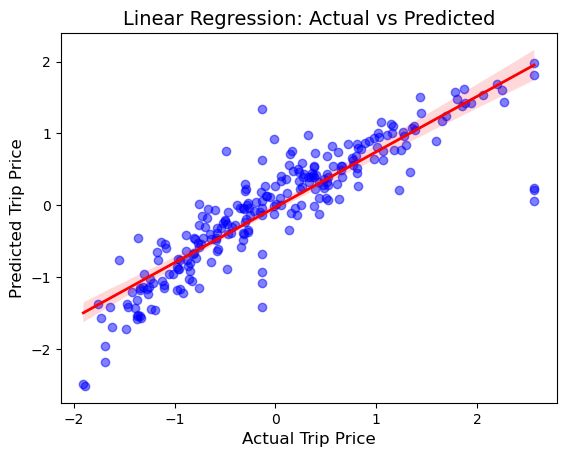

In [105]:
from sklearn.linear_model import Ridge, Lasso

# Lasso Regression
lasso = Lasso(alpha=0.01)  
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Ridge Regression
ridge = Ridge(alpha=0.01) 
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)


print("Lasso R^2:", r2_score(y_test, y_pred_lasso))
print("Ridge R^2:", r2_score(y_test, y_pred_ridge))
print("mean squared error Lasso",mean_squared_error(y_test,y_pred_lasso))
print("mean squared error Ridge ",mean_squared_error(y_test,y_pred_ridge))

plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5)

sns.regplot(x=y_test, y=y_pred_ridge, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})

plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)

plt.show()

r2_score 0.8529243036360793
mean squared error forest  0.14369041167968044


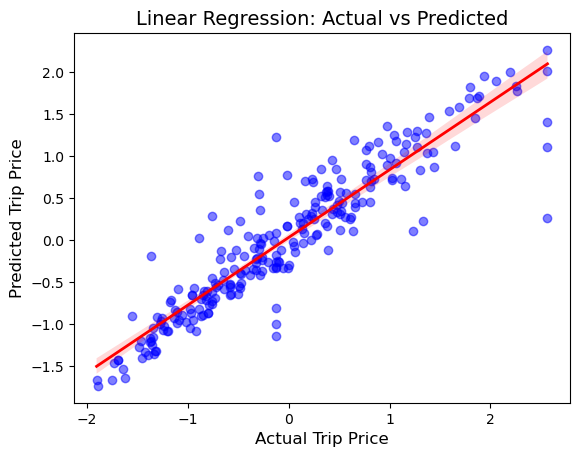

In [106]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred_rf))
print("mean squared error forest ",mean_squared_error(y_test,y_pred_rf))

plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)

sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})

plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)

plt.show()

r2_score 0.851120004910094
mean squared error forest  0.14545318032969884


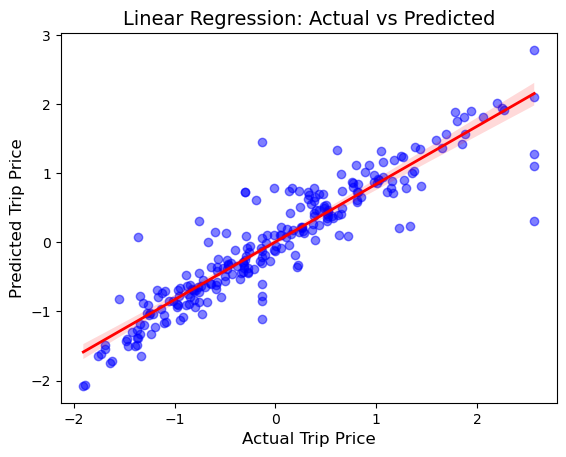

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred_gb=model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred_gb))
print("mean squared error forest ",mean_squared_error(y_test,y_pred_gb))

plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)

sns.regplot(x=y_test, y=y_pred_gb, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})


plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)


plt.show()

0.82600225929118
mean squared error forest  0.16999278338904297


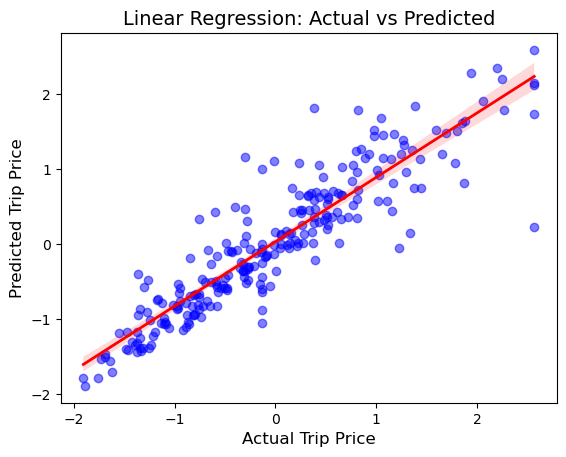

In [108]:
!pip install xgboost

import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred_xgb=model.predict(x_test)
print(r2_score(y_test,y_pred_xgb))
print("mean squared error forest ",mean_squared_error(y_test,y_pred_xgb))

plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
sns.regplot(x=y_test, y=y_pred_xgb, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})
plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)
plt.show()

r2_score 0.8477179948877228
mean squared error forest  0.14877688528393784


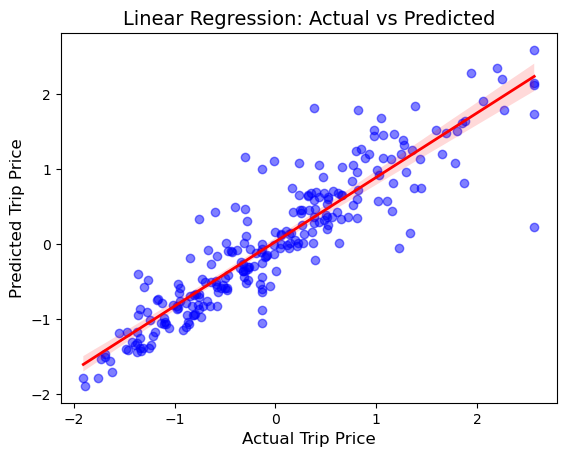

In [109]:
! pip install svm
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print("mean squared error forest ",mean_squared_error(y_test,y_pred))

plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
sns.regplot(x=y_test, y=y_pred_xgb, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})
plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)
plt.show()

Linear R^2: 0.7984386535273578
mean squared error 0.19692194950891606


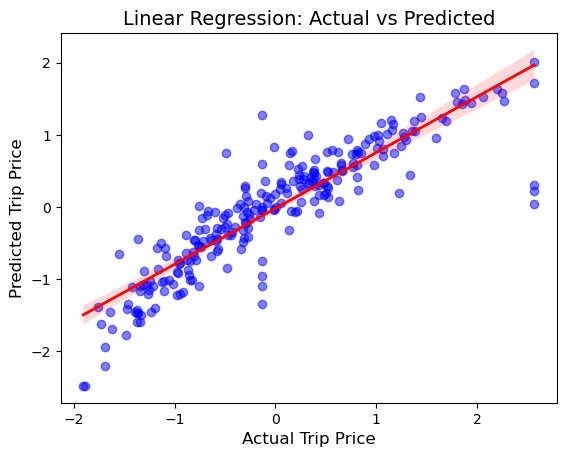

In [110]:
from sklearn.model_selection import train_test_split
x=new_df[['Trip_Distance_km','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]
y=new_df['Trip_Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred_reg=LR.predict(x_test)
print("Linear R^2:", r2_score(y_test, y_pred_reg))
print("mean squared error",mean_squared_error(y_test,y_pred_reg))


plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5)


sns.regplot(x=y_test, y=y_pred_reg, scatter=False, color='red', line_kws={"color": "red", "linewidth": 2})


plt.title('Linear Regression: Actual vs Predicted', fontsize=14)
plt.xlabel('Actual Trip Price', fontsize=12)
plt.ylabel('Predicted Trip Price', fontsize=12)

 
plt.show()